In [2]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

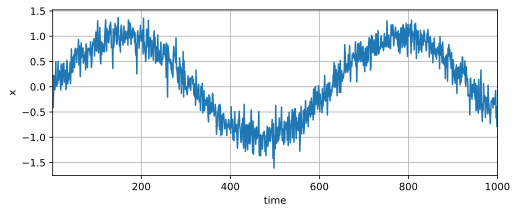

In [4]:
class Data(d2l.DataModule):
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
        self.save_hyperparameters()
        self.time = torch.arange(1, T + 1, dtype=torch.float32)
        self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2
data = Data()
d2l.plot(data.time, data.x, 'time', 'x', xlim=[1, 1000], figsize=(8, 3))

In [5]:
@d2l.add_to_class(Data)
def get_dataloader(self, train):
    features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]
    self.features = torch.stack(features, 1)
    self.labels = self.x[self.tau:].reshape((-1, 1))
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.features, self.labels], train, i)

# 

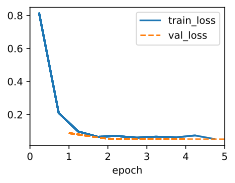

In [7]:
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

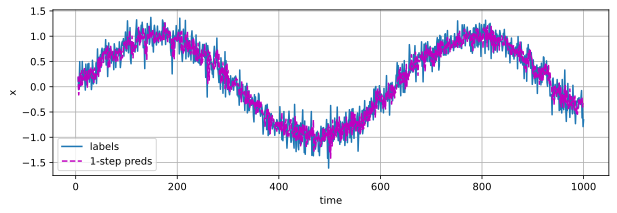

In [32]:
onestep_preds = model(data.features).detach().numpy()
d2l.plot(data.time[data.tau:], [data.labels, onestep_preds], 'time', 'x',
         legend=['labels', '1-step preds'], figsize=(10, 3))

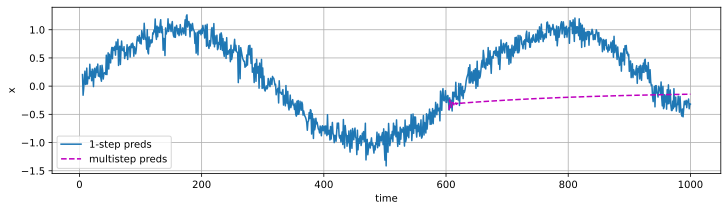

In [36]:
multistep_preds = torch.zeros(data.T)
multistep_preds[:] = data.x
for i in range(data.num_train + data.tau, data.T):
    multistep_preds[i] = model(
        multistep_preds[i - data.tau:i].reshape((1, -1)))
multistep_preds = multistep_preds.detach().numpy()

d2l.plot([data.time[data.tau:], data.time[data.num_train+data.tau:]],
         [onestep_preds, multistep_preds[data.num_train+data.tau:]], 'time',
         'x', legend=['1-step preds', 'multistep preds'], figsize=(12, 3))

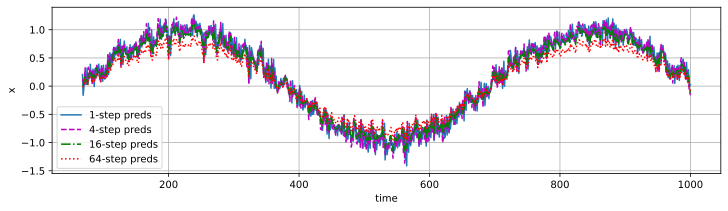

In [39]:
def k_step_pred(k):
    features = []
    for i in range(data.tau):
        features.append(data.x[i : i+data.T-data.tau-k+1])
    # The (i+tau)-th element stores the (i+1)-step-ahead predictions
    for i in range(k):
        preds = model(torch.stack(features[i : i+data.tau], 1))
        features.append(preds.reshape(-1))
    return features[data.tau:]

steps = (1, 4, 16, 64)
preds = k_step_pred(steps[-1])
d2l.plot(data.time[data.tau+steps[-1]-1:],
         [preds[k - 1].detach().numpy() for k in steps], 'time', 'x',
         legend=[f'{k}-step preds' for k in steps], figsize=(12, 3))

In [40]:
data2 = Data(tau=16)

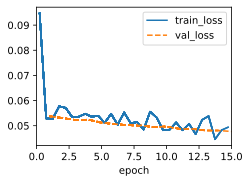

In [54]:
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=15)
trainer.fit(model, data2)

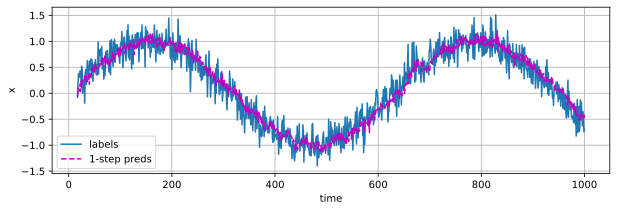

In [55]:
onestep_preds2 = model(data2.features).detach().numpy()
d2l.plot(data2.time[data2.tau:], [data2.labels, onestep_preds2], 'time', 'x',
         legend=['labels', '1-step preds'], figsize=(10, 3))

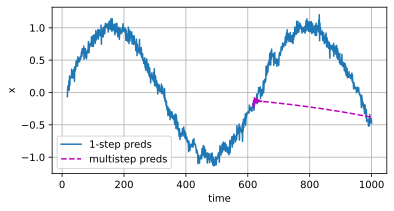

In [56]:
multistep_preds2 = torch.zeros(data2.T)
multistep_preds2[:] = data2.x
for i in range(data2.num_train + data2.tau, data2.T):
    multistep_preds2[i] = model(
        multistep_preds2[i - data2.tau:i].reshape((1, -1)))
multistep_preds2 = multistep_preds2.detach().numpy()

d2l.plot([data2.time[data2.tau:], data2.time[data2.num_train+data2.tau:]],
         [onestep_preds2, multistep_preds2[data2.num_train+data2.tau:]], 'time',
         'x', legend=['1-step preds', 'multistep preds'], figsize=(6, 3))

In [57]:
data3 = Data(tau=2)

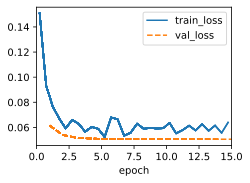

In [58]:
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=15)
trainer.fit(model, data3)

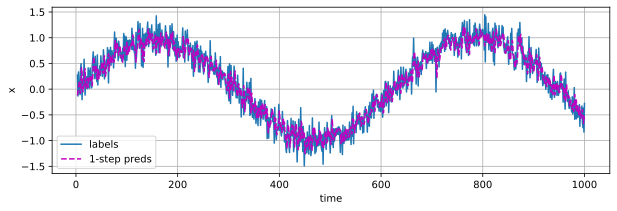

In [59]:
onestep_preds3 = model(data3.features).detach().numpy()
d2l.plot(data3.time[data3.tau:], [data3.labels, onestep_preds3], 'time', 'x',
         legend=['labels', '1-step preds'], figsize=(10, 3))

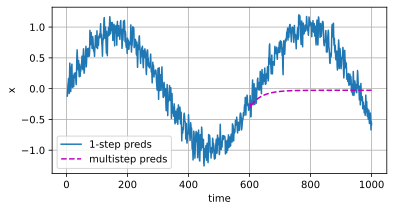

In [60]:
multistep_preds3 = torch.zeros(data3.T)
multistep_preds3[:] = data3.x
for i in range(data3.num_train + data3.tau, data3.T):
    multistep_preds3[i] = model(
        multistep_preds3[i - data3.tau:i].reshape((1, -1)))
multistep_preds3 = multistep_preds3.detach().numpy()

d2l.plot([data3.time[data3.tau:], data3.time[data3.num_train+data3.tau:]],
         [onestep_preds3, multistep_preds3[data3.num_train+data3.tau:]], 'time',
         'x', legend=['1-step preds', 'multistep preds'], figsize=(6, 3))

In [ ]:
d2l.plot([data3.time[data3.tau:], data3.time[data3.num_train+data3.tau:]],
         [onestep_preds3, multistep_preds3[data3.num_train+data3.tau:]], 'time',
         'x', legend=['1-step preds', 'multistep preds'], figsize=(6, 3))